# BIKE SHARING ASSIGNMENT

PROBLEM STATEMENT:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

The company wants to know:

Which variables are significant in predicting the demand for shared bikes.

How well those variables describe the bike demands

# DATA SOURCING AND UNDERSTANDING

In [1056]:
#import libraraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [1057]:
# upload the dataset using pandas
df=pd.read_csv('day.csv')

In [1058]:
#check the top 5 observations
df.head(50)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.181250,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.686950,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.470250,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.606100,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.463500,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.660450,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.441950,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.112700,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.808750,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.544400,48.2917,14.958889,41,1280,1321


In [1059]:
#check the shape of the dataframe
df.shape

(730, 16)

In [1060]:
# check the type and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1061]:
# check the % of null values per column
100*((df.isnull().sum())/len(df))

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

there are no null values in the data frame

In [1062]:
# check the values of the columns
for i in df.columns:
    print(i)
    print(df[i].value_counts())

instant
730    1
251    1
249    1
248    1
247    1
      ..
485    1
484    1
483    1
482    1
1      1
Name: instant, Length: 730, dtype: int64
dteday
10-03-2019    1
28-10-2019    1
11-09-2019    1
25-09-2019    1
14-10-2019    1
             ..
11-04-2019    1
21-05-2018    1
22-02-2018    1
05-04-2019    1
19-04-2019    1
Name: dteday, Length: 730, dtype: int64
season
3    188
2    184
1    180
4    178
Name: season, dtype: int64
yr
1    365
0    365
Name: yr, dtype: int64
mnth
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64
holiday
0    709
1     21
Name: holiday, dtype: int64
weekday
6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64
workingday
1    499
0    231
Name: workingday, dtype: int64
weathersit
1    463
2    246
3     21
Name: weathersit, dtype: int64
temp
10.899153    5
26.035000    5
23.130847    4
28.563347    4
27.880000    4
            ..


In [1063]:
#find the number of unique values 
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

there are no single unique value columns in the dataframe

In [1065]:
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# DATA CLEANING AND WRANGLING


### DEALING WITH DATE TIME VARIABLE


### As the month, year ,weekday column  are already present in the dataframe we dont need dteday

In [1066]:
#drop the dteday column
df.drop('dteday',axis=1,inplace=True)

In [1067]:
df.head(5)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Column yr represents two values 0--2018 and 1--2019


In [1068]:
df['yr'].value_counts()

1    365
0    365
Name: yr, dtype: int64


###  Columns 'mnth' and 'weekday' can be considered as Categorical and thus convert them into the string values


### column 'mnth'

In [1069]:
#change the month number to mnth name
import calendar
df['mnth'] = df['mnth'].apply(lambda x: calendar.month_abbr[x])


### column weekday- 

In [1071]:
#convert the weekday values to string the day of the week
df.weekday.replace({6:'Monday', 0:'Tuesday', 1:'Wednesday', 2:'Thursday', 3:'Friday', 4:'Saturday', 5:'Sunday'},inplace= True)

In [1072]:
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,Jan,0,Monday,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,1,0,Jan,0,Tuesday,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,1,0,Jan,0,Wednesday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,1,0,Jan,0,Thursday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,1,0,Jan,0,Friday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### for columns season and weathersit , the numerical values denote a categorical feature, therefore converting them to string.

In [1073]:
#replace season values into the season names
df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)


In [1074]:
#replace weathersit values with weather category
#weathersit : 
#    1: Clear, Few clouds, Partly cloudy, Partly cloudy
#    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
df.weathersit.replace({1:'weather_clear',2:'weather_Misty',3:'weather_light_precip',4:'weather_heavy_precip'},inplace = True)

In [1075]:
df.head(5)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,spring,0,Jan,0,Monday,0,weather_Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,spring,0,Jan,0,Tuesday,0,weather_Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,spring,0,Jan,0,Wednesday,1,weather_clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,spring,0,Jan,0,Thursday,1,weather_clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,spring,0,Jan,0,Friday,1,weather_clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### DROPPING UNNECESSARY COLUMNS

### Dropping 'instant' column as it denotes the index and does not provide any relevant information.

In [1076]:
# Dropping 'instant' column as it denotes the index and does not provide any relevant information.
df.drop('instant',axis=1,inplace=True)

### Dropping 'registered' and casual columns- Since our target variable is cnt and cnt= casual+registered, we can drop these two variables.

In [1077]:
# Dropping 'registered' and casual columns- Since our target variable cnt= casual+registered, we can drop these two variables.
df.drop(['registered','casual'],axis=1,inplace=True)

### CHECKING FOR OUTLIERS

In [1078]:
# describe numerical data
df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


### looking at the statistics above we can see that for windspeed the max seems to be much higher than the 75percentile

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
80%       16.639785
90%       19.833997
95%       22.999988
99%       27.380948
100%      34.000021
max       34.000021
Name: windspeed, dtype: float64

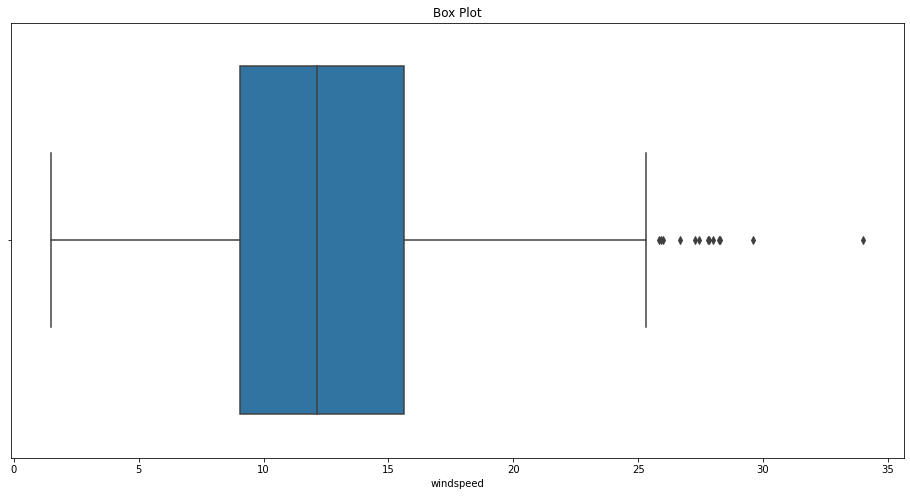

In [1079]:

# plot boxplot for windspeed and check the different percentile values
fig,ax=plt.subplots(figsize=(16,8))
ax.set_title("Box Plot")
sns.boxplot(data =df, x='windspeed',ax=ax,orient='v')
df['windspeed'].describe(percentiles=[.25, .50, .75, .80 , .90, .95, .99 , 1])

we can clearly see the outlier after 99% so lets remove

In [1080]:
#removing outlier
df = df[df["windspeed"] < df["windspeed"].quantile(0.99)]

# EXPLORATORY DATA ANALYSIS

In [1081]:
# define function for univariate analysis for numerical varaibles
def univariate_conti(data,col):
    
    fig,ax=plt.subplots(1,3,figsize=(16,8))
    ax[0].set_title("Violin Plot")
    sns.violinplot(data =data, x=col,ax=ax[0])
    ax[1].set_title("Distribution Plot")
    sns.distplot(data[col],bins=30,ax=ax[1])
    
    ax[2].set_title("Box Plot")
    sns.boxplot(data =data, x=col,ax=ax[2],orient='v')
# define function for segmented univariate     

 ## TARGET VARIABLE- 'cnt' -count of total rental bikes including both casual and registered

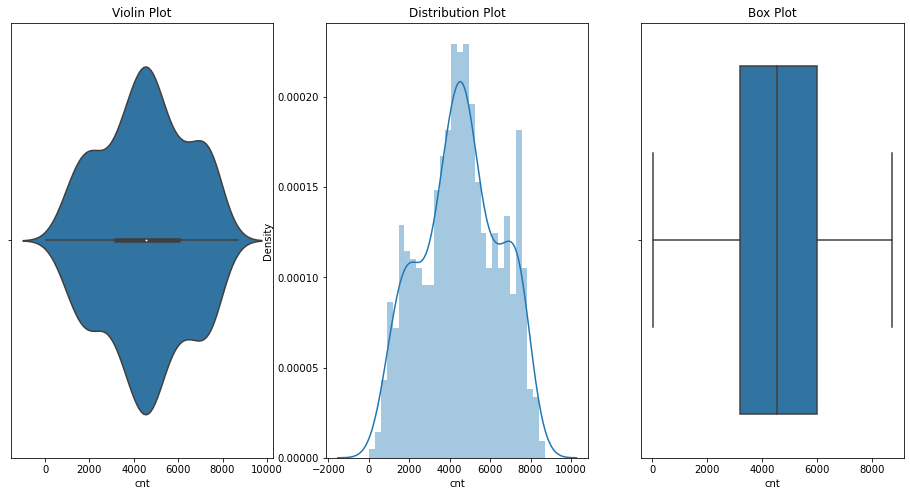

In [1082]:
univariate_conti(df,'cnt')


### Observation:- 'the distribution of total count of bike rentals shows  most of values ranging between 3000 to 6000'

# INDEPENDANT VARIABLES

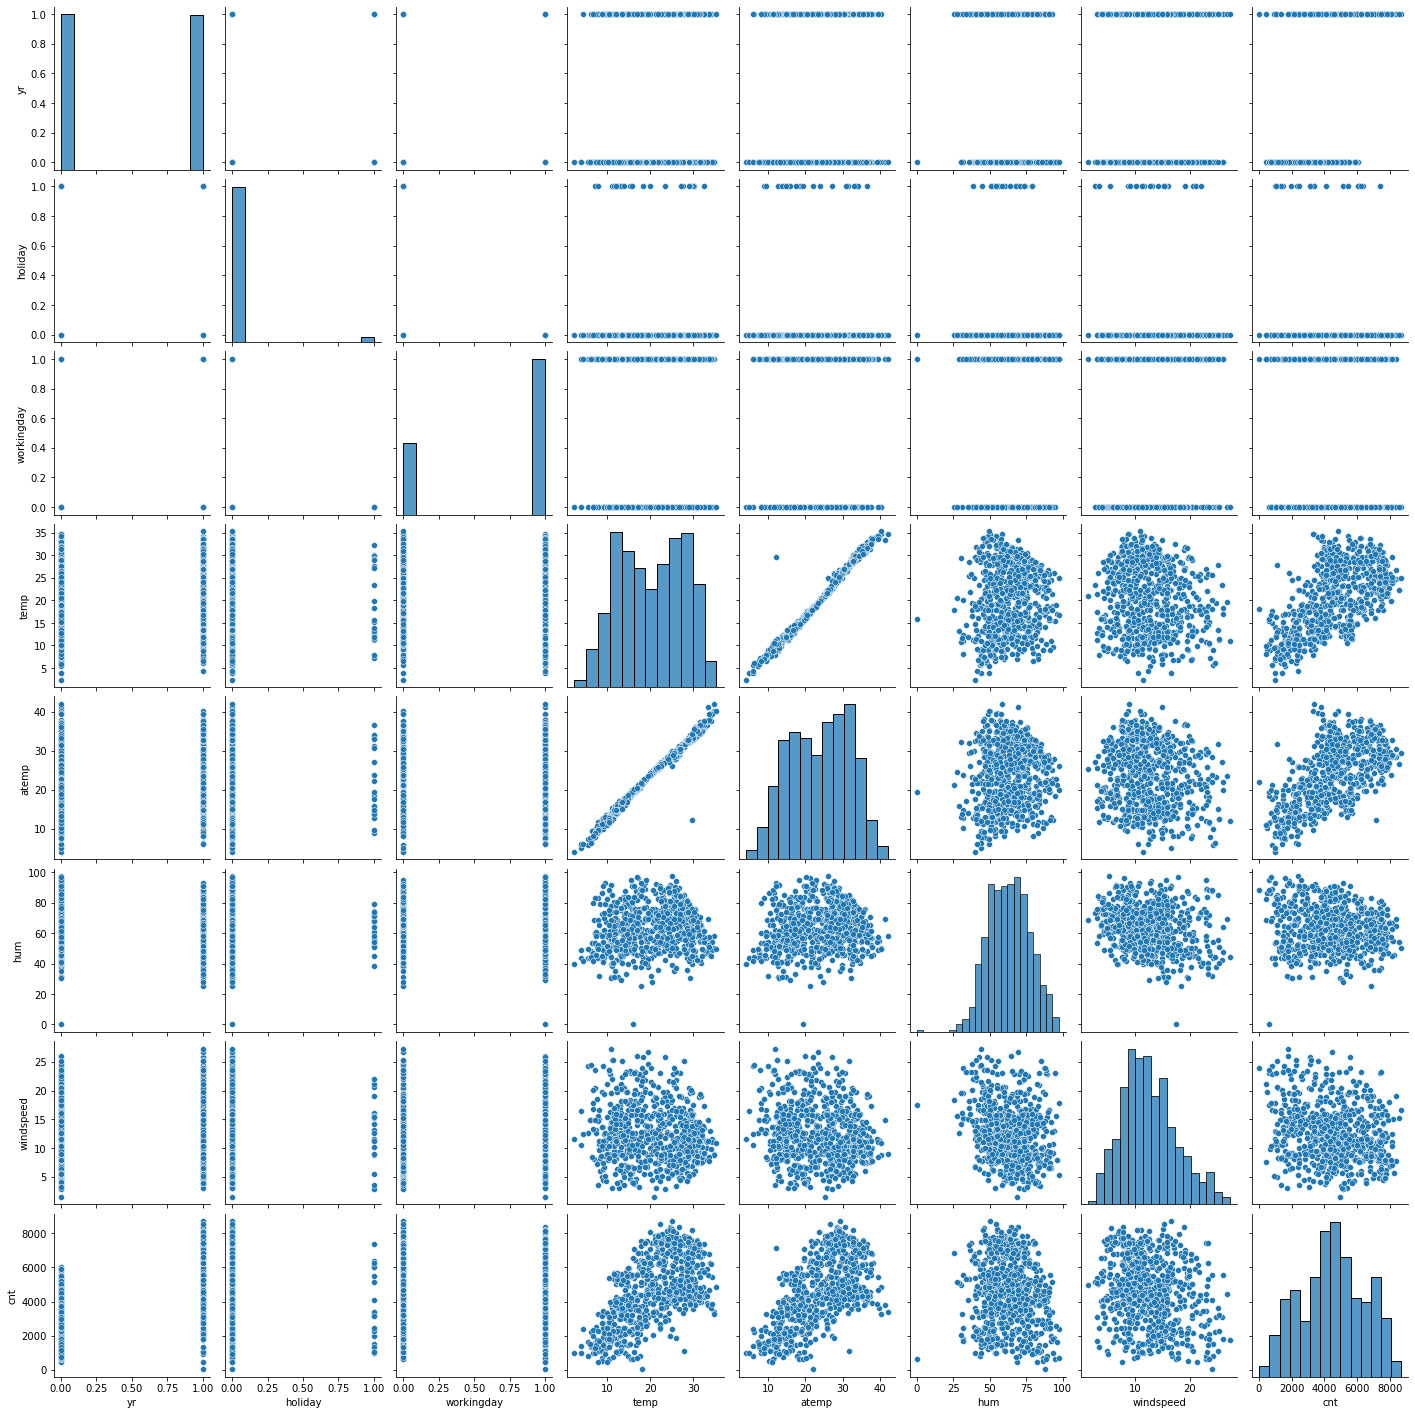

In [1083]:
# check the pairplot and relationship between different numerical variables with target variable'cnt' and with other independant variables
sns.pairplot(df)

### Observations:-
### Pairplot showed that there is a positive relationship between 

### 1.'cnt' and 'temp'/atemp'

### 2.'cnt' and 'yr'

### 3.'temp' and'atemp'

### It also shows a weak negative relationship between

### 3.'cnt' and 'holiday'

### 4.'cnt' and 'hum'

In [1084]:
df.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008721,-0.001882,0.054023,0.053349,-0.113059,-0.019522,0.575405
holiday,0.008721,1.000000,-0.254769,-0.030240,-0.034373,-0.018519,0.012905,-0.070477
workingday,-0.001882,-0.254769,1.000000,0.048384,0.046951,0.016345,-0.013471,0.056735
temp,0.054023,-0.030240,0.048384,1.000000,0.991726,0.119066,-0.143876,0.624924
atemp,0.053349,-0.034373,0.046951,0.991726,1.000000,0.131246,-0.169427,0.628462
hum,-0.113059,-0.018519,0.016345,0.119066,0.131246,1.000000,-0.214479,-0.115654
windspeed,-0.019522,0.012905,-0.013471,-0.143876,-0.169427,-0.214479,1.000000,-0.224266
cnt,0.575405,-0.070477,0.056735,0.624924,0.628462,-0.115654,-0.224266,1.000000


<AxesSubplot:>

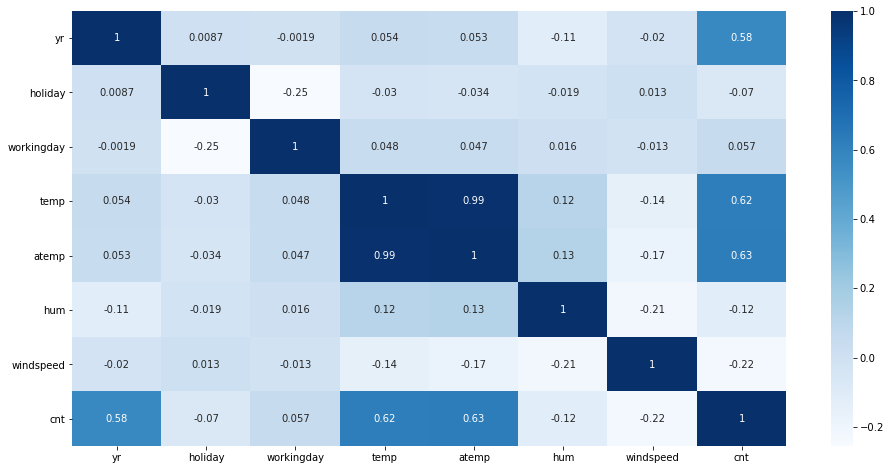

In [1085]:
#plot heatmap to see the correlation
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

### Observations: from heatmap we can confirm the strong relationship between

### 1. cnt and yr

### 2. cnt and temp/atemp

### we also determined that temp and atemp  are strongly correlated(0.99) to each other and thus  only one may be needed for building model .We ll drop atemp column later in the model builiding


### CATEGORICAL VARIABLES

<AxesSubplot:xlabel='season', ylabel='cnt'>

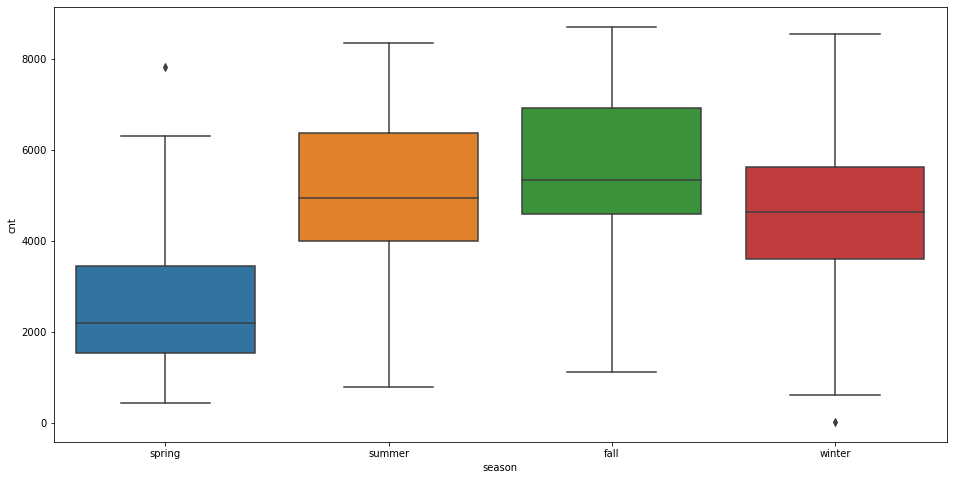

In [1086]:
# distribution of cnt vs season
plt.figure(figsize=(16,8))
sns.boxplot(x='season',y='cnt',data=df)

### Observation: Fall season  has higher count for bike rentals  with spring season being the least.

### Relationship between cnt and weather

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

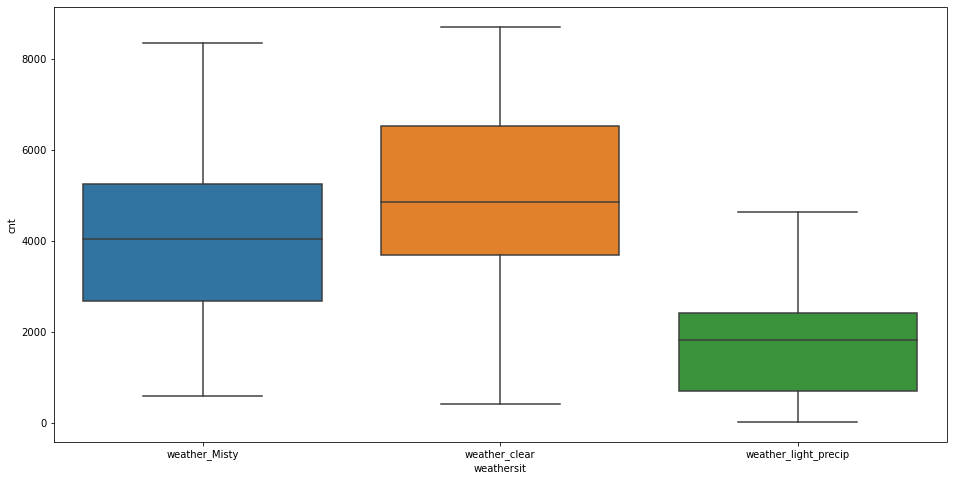

In [1087]:
plt.figure(figsize=(16,8))
sns.boxplot(x='weathersit',y='cnt',data=df)


### Observation: weather _clear(Clear, Few clouds, Partly cloudy, Partly cloudy) is associated with higher count for bike rentals(median -appx 4700) compared to weather_light_precip( Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) which is the least(median-appx 2000)

### Relationship between cnt and weekday

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

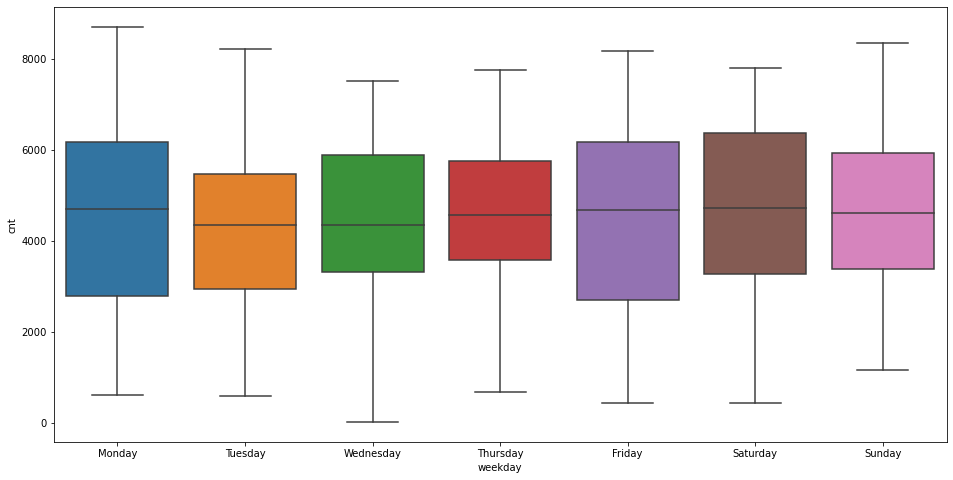

In [1088]:
#distribution of cnt with weekday
plt.figure(figsize=(16,8))
sns.boxplot(x='weekday',y='cnt',data=df)


### Observation: There was no significant change in the median number of rentals with different weekdays

### Relationship between cnt and yr¶

<AxesSubplot:xlabel='yr', ylabel='cnt'>

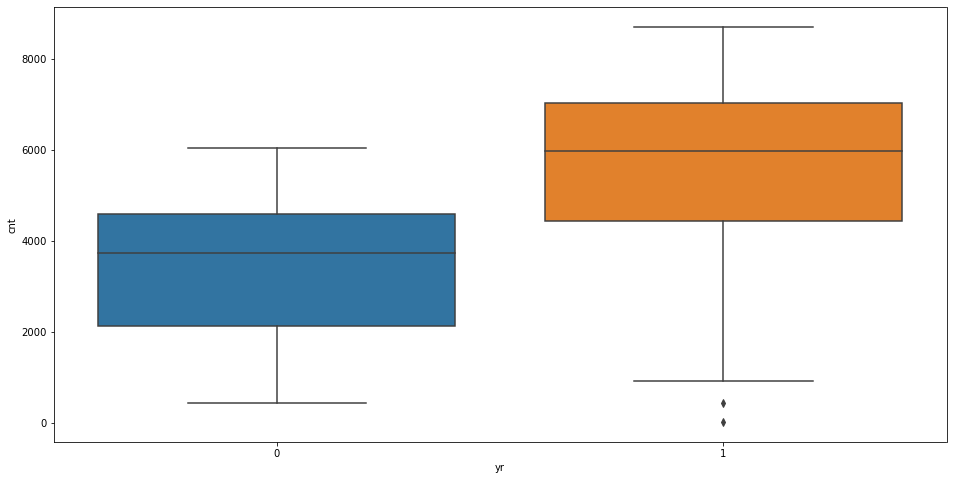

In [1089]:
plt.figure(figsize=(16,8))
sns.boxplot(x='yr',y='cnt',data=df)

### Observataion: there are more number of rentals in year 2019 vs 2018 showing there was an increasing trend with the increasing years

### Relationship between cnt and workingday

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

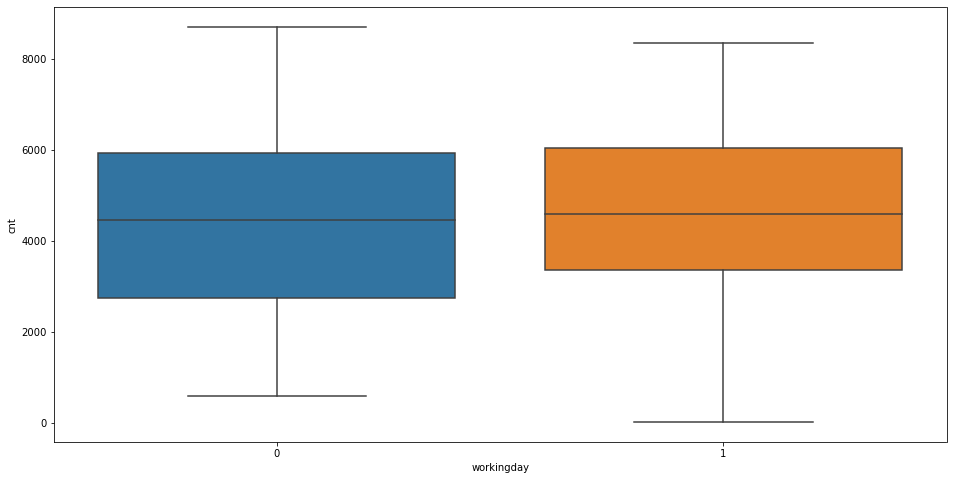

In [1090]:
plt.figure(figsize=(16,8))
sns.boxplot(x='workingday',y='cnt',data=df)

### Relationship between cnt and holiday

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

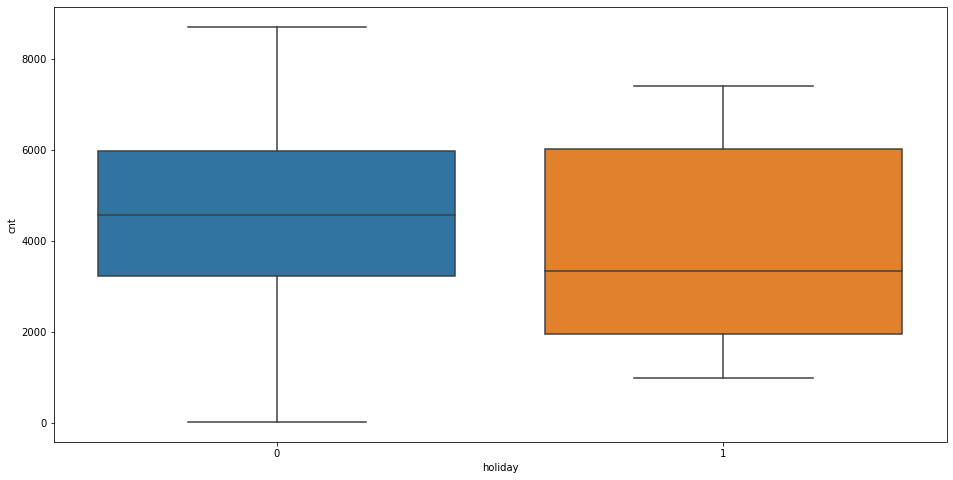

In [1091]:
plt.figure(figsize=(16,8))
sns.boxplot(x='holiday',y='cnt',data=df)

### Observation: Again the holidays seems to be having the lower numbers ¶

### Relationship between cnt and mnth

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

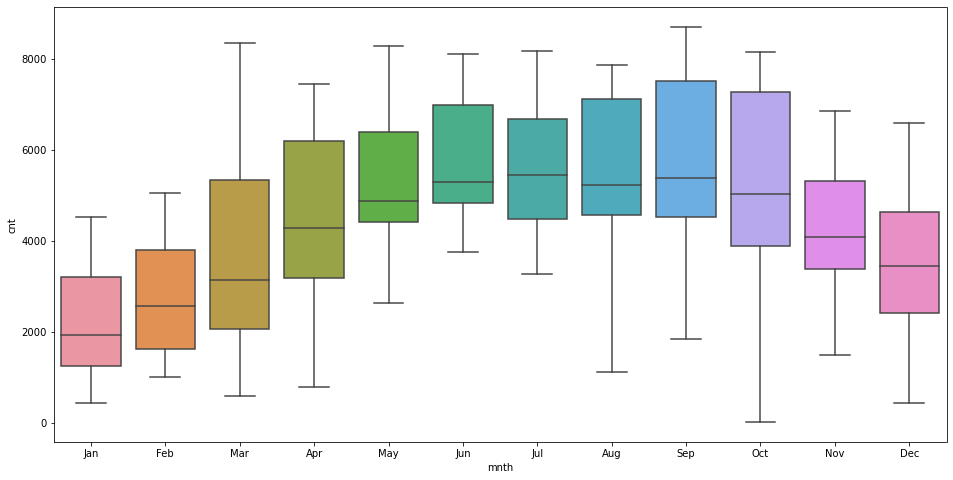

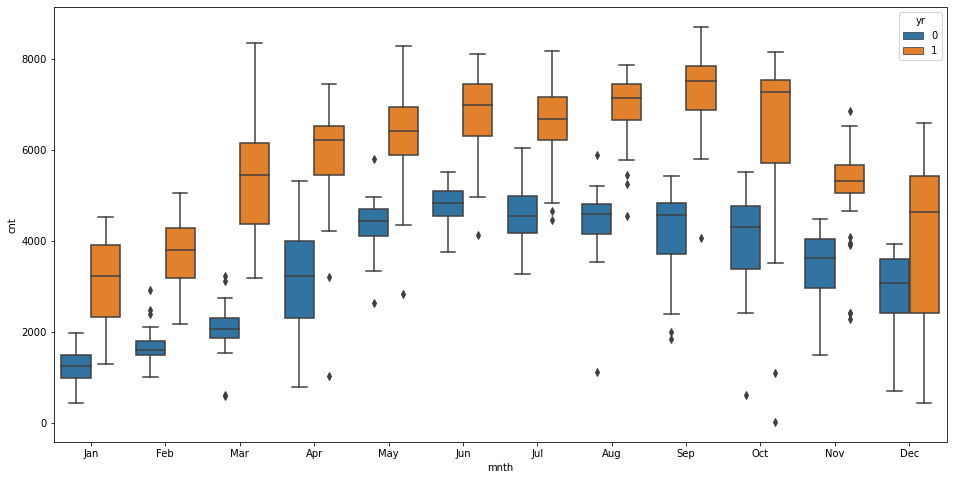

In [1092]:
plt.figure(figsize=(16,8))
sns.boxplot(x='mnth',y='cnt',data=df)

plt.figure(figsize=(16,8))
sns.boxplot(x='mnth',y='cnt',data=df,hue='yr')

### Observation: Overall september mnth seems to be having high rental numbers, There seems to be the increasing trend from January to september(in 2019) and January to June (in 2018)and then fall to upto december


# DATA PREPARATION:


In [1093]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,0,weather_Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,0,weather_Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,weather_clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,weather_clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,weather_clear,9.305237,11.46350,43.6957,12.522300,1600


### CREATING DUMMY VARIABLES

In [1094]:
# convert the season,weathersit ,weekday into numericals using get.dummy
df= pd.get_dummies(data=df,columns=['season','weathersit','weekday','mnth'], drop_first = True)

In [1095]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter',
       'weathersit_weather_clear', 'weathersit_weather_light_precip',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep'],
      dtype='object')

In [1096]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


In [1097]:
df.shape

(722, 30)

# SPLITTING DATA

In [1098]:
# Split dataset between the train and test data set.
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

# SCALING DATA

In [1099]:
scaler= StandardScaler()

In [1100]:
# apply scaller to the following variables in train_data and test data, (leaving the variables with 1,0 values and the target variable as it is) 
num_data=['temp','atemp','hum','windspeed']
df_train[num_data]=scaler.fit_transform(df_train[num_data])
df_test[num_data]=scaler.transform(df_test[num_data])

In [1101]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
728,1,0,0,-1.316289,-1.504871,-1.096250,2.214556,1796,1,0,...,1,0,0,0,0,0,0,0,0,0
480,1,0,1,0.028167,0.069774,0.830565,-0.135616,5026,0,1,...,0,0,0,0,0,0,0,0,0,0
113,0,0,0,0.490183,0.496001,1.212398,0.074258,4191,0,1,...,0,0,0,0,0,0,0,0,0,0
581,1,0,0,1.529711,1.616994,0.096260,1.400257,5464,0,0,...,0,0,0,0,0,0,0,0,0,0
498,1,0,1,0.443978,0.484354,1.062600,0.351170,2843,0,1,...,0,0,0,0,0,0,1,0,0,0


<AxesSubplot:>

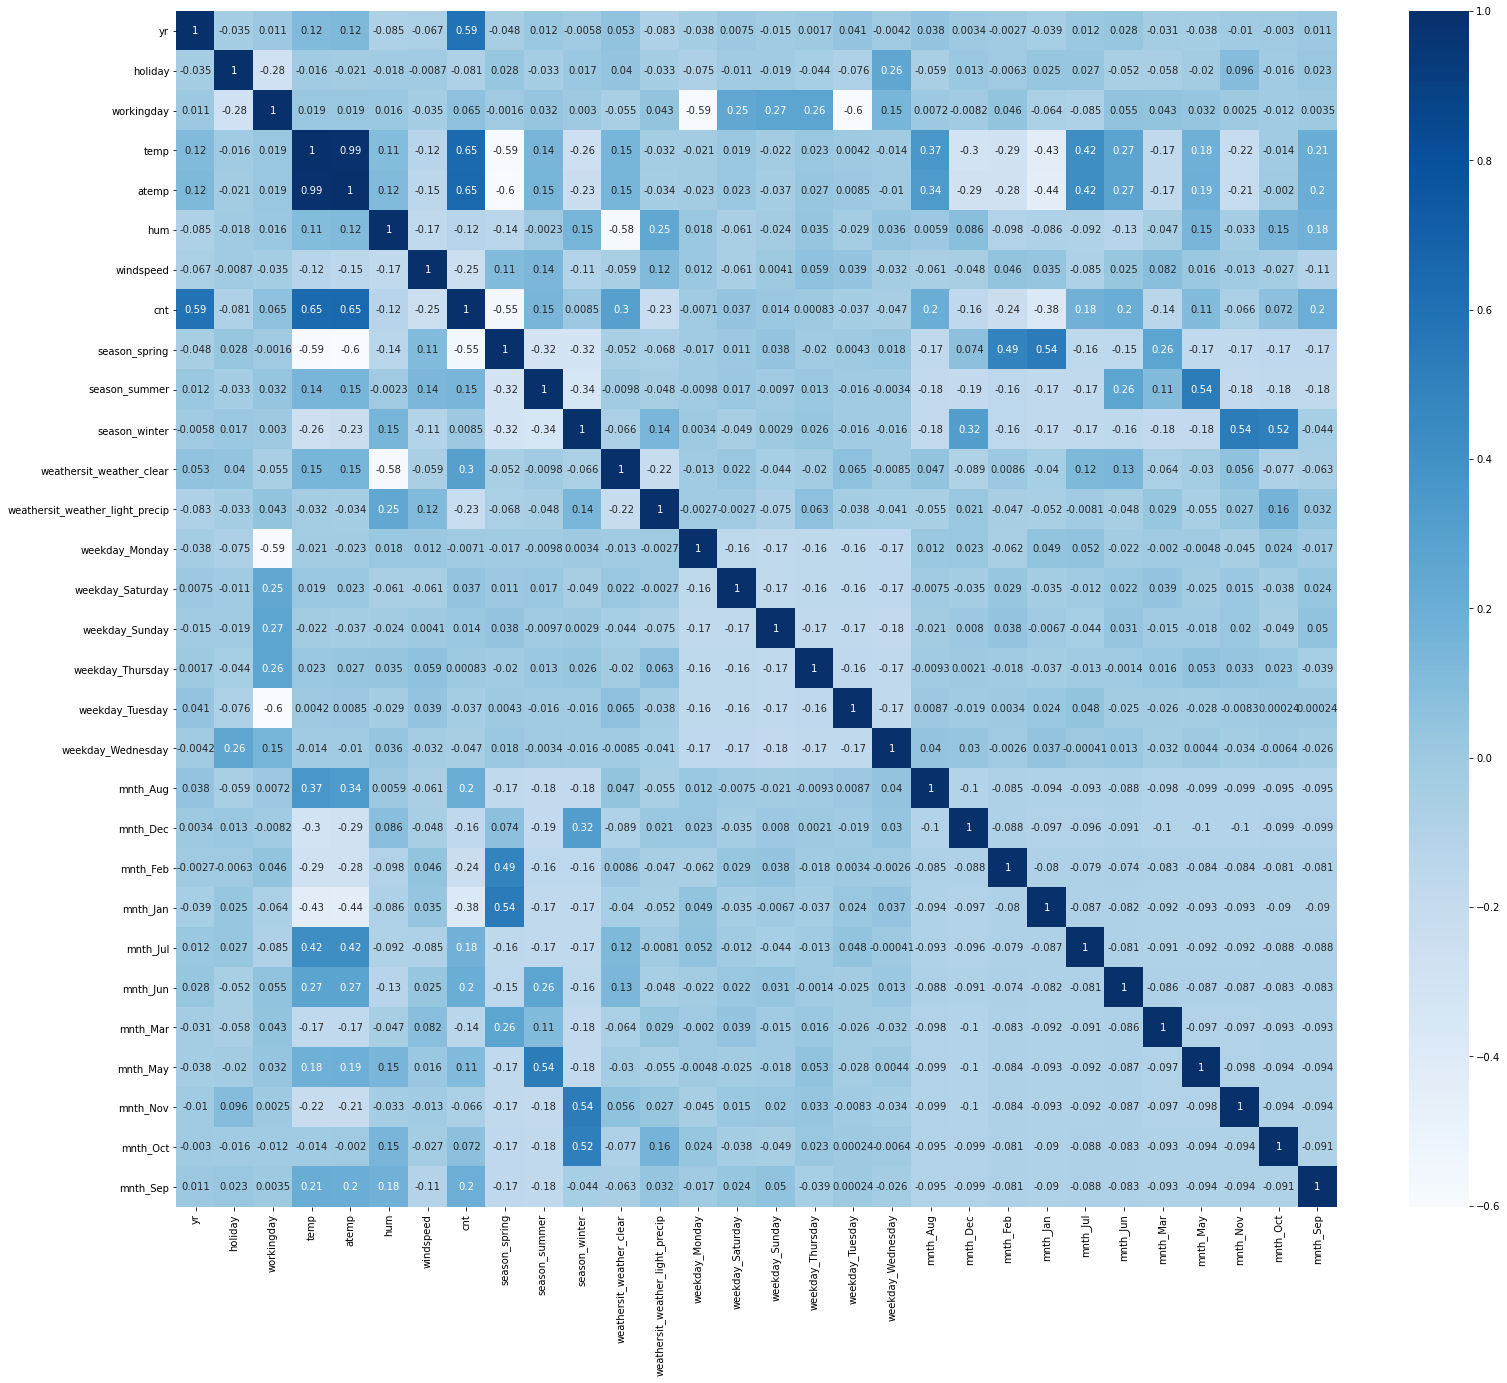

In [1102]:
# check correlation in df_train
#plot heatmap to see the correlation
plt.figure(figsize=(26,22))
sns.heatmap(df_train.corr(),cmap='Blues',annot=True)

### Observations:
### there is also some relationship between temp  with different seasons. 
### we also noticed some positive relationship between cnt ( number of rentals) and weathersit-clear and negative relationship with season-spring.
### There also seems to be correlation between humidity and the weathersit-light precip and season winter
### There is also a positive relationship with cnt and mnth_sep,mnth_jun and mnth_Aug

# Dividing into X and y dataset

In [1103]:
# removing target variable from X_training set and creating y_trainingset with cnt
y_train=df_train['cnt']
X_train=df_train.drop('cnt',axis=1)


In [1104]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
728,1,0,0,-1.316289,-1.504871,-1.096250,2.214556,1,0,0,...,1,0,0,0,0,0,0,0,0,0
480,1,0,1,0.028167,0.069774,0.830565,-0.135616,0,1,0,...,0,0,0,0,0,0,0,0,0,0
113,0,0,0,0.490183,0.496001,1.212398,0.074258,0,1,0,...,0,0,0,0,0,0,0,0,0,0
581,1,0,0,1.529711,1.616994,0.096260,1.400257,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,1,0,1,0.443978,0.484354,1.062600,0.351170,0,1,0,...,0,0,0,0,0,0,1,0,0,0


# Building Model
## Model1

In [1109]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1110]:
# build the modelusing linear regression and rfe
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 12)             # running RFE for 12 features
rfe = rfe.fit(X_train, y_train)

In [1111]:
#list the top 12 features significant for rfe
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 12),
 ('hum', False, 6),
 ('windspeed', False, 7),
 ('season_spring', True, 1),
 ('season_summer', False, 5),
 ('season_winter', True, 1),
 ('weathersit_weather_clear', True, 1),
 ('weathersit_weather_light_precip', True, 1),
 ('weekday_Monday', True, 1),
 ('weekday_Saturday', False, 17),
 ('weekday_Sunday', False, 15),
 ('weekday_Thursday', False, 13),
 ('weekday_Tuesday', True, 1),
 ('weekday_Wednesday', False, 9),
 ('mnth_Aug', False, 14),
 ('mnth_Dec', False, 2),
 ('mnth_Feb', False, 8),
 ('mnth_Jan', False, 3),
 ('mnth_Jul', False, 4),
 ('mnth_Jun', False, 11),
 ('mnth_Mar', False, 18),
 ('mnth_May', False, 10),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 16),
 ('mnth_Sep', True, 1)]

In [1112]:
#top 12 variables for feature selection
column_rele=X_train.columns[rfe.support_]
column_rele

Index(['yr', 'holiday', 'workingday', 'temp', 'season_spring', 'season_winter',
       'weathersit_weather_clear', 'weathersit_weather_light_precip',
       'weekday_Monday', 'weekday_Tuesday', 'mnth_Nov', 'mnth_Sep'],
      dtype='object')

In [1113]:
#dropping the columns not featured in top 12 rfe
X_train_rfe=X_train[column_rele]

In [1114]:
X_train_rfe.head()

,yr,holiday,workingday,temp,season_spring,season_winter,weathersit_weather_clear,weathersit_weather_light_precip,weekday_Monday,weekday_Tuesday,mnth_Nov,mnth_Sep
728,1,0,0,-1.316289,1,0,1,0,0,1,0,0
480,1,0,1,0.028167,0,0,0,0,0,0,0,0
113,0,0,0,0.490183,0,0,0,0,0,1,0,0
581,1,0,0,1.529711,0,0,1,0,0,1,0,0
498,1,0,1,0.443978,0,0,0,0,0,0,0,0


In [1115]:
import statsmodels.api as sm

In [1116]:
#statsmodel for statistics
# addconstant 
X_train_rfe_sm=sm.add_constant(X_train_rfe)
model=sm.OLS(y_train,X_train_rfe_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     200.5
Date:                Sat, 31 Jul 2021   Prob (F-statistic):          4.68e-174
Time:                        21:20:19   Log-Likelihood:                -4117.4
No. Observations:                 505   AIC:                             8259.
Df Residuals:                     493   BIC:                             8310.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            2420.8051     85.199     28.413      0.000    2253.407    2588.204
yr                               1988.2631     76.815     25.884      0.000    1837.339    2139.188
holiday                           177.5023    170.837      1.039      0.299    -158.156     513.160
workingday                        902.4610     64.197     14.058      0.000     776.328    1028.594
temp                              800.7846     60.006     13.345      0.000     682.885     918.684
season_spring                   -1141.8764    142.072     -8.037      0.000   -1421.018    -862.735
season_winter                     505.6930    123.191      4.105      0.000     263.649     747.737
weathersit_weather_clear          731.2434     81.225      9.003      0.000     571.653     890.834
weathersit_weather_light_precip -1963.5726    231.557     -8.480      0.000   -2418.533   -1508.612
weekday_Monday                    894.7919     94.896      9.429      0.000     708.342    1081.241
weekday_Tuesday                   446.0499     95.219      4.684      0.000     258.965     633.135
mnth_Nov                         -456.1855    162.149     -2.813      0.005    -774.773    -137.598
mnth_Sep                          584.7860    141.530      4.132      0.000     306.710     862.862
==============================================================================
Omnibus:                       76.746   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.985
Skew:                          -0.824   Prob(JB):                     9.05e-37
Kurtosis:                       5.274   Cond. No.                     1.26e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.55e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [1117]:
# calculate the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,4.31
3,temp,2.51
4,season_spring,2.51
5,season_winter,2.00
9,weekday_Tuesday,1.77
8,weekday_Monday,1.60
10,mnth_Nov,1.49
1,holiday,1.21
6,weathersit_weather_clear,1.10
7,weathersit_weather_light_precip,1.08


### observation:    Adjusted R2-0.813 (which seems pretty good)
### from above we found that 'holiday' has  high p-value(0.299), Thus we will drop the 'holiday' column

## Model2

In [1118]:
# dropping 'holiday' and rebuilding the model and checking the summary
X_train_rfe.drop('holiday',axis=1,inplace=True)
X_train_rfe_sm=sm.add_constant(X_train_rfe)
model=sm.OLS(y_train,X_train_rfe_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     200.5
Date:                Sat, 31 Jul 2021   Prob (F-statistic):          4.68e-174
Time:                        21:20:41   Log-Likelihood:                -4117.4
No. Observations:                 505   AIC:                             8259.
Df Residuals:                     493   BIC:                             8310.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            2598.3075    227.215     11.435      0.000    2151.878    3044.737
yr                               1988.2631     76.815     25.884      0.000    1837.339    2139.188
workingday                        724.9587    213.206      3.400      0.001     306.055    1143.863
temp                              800.7846     60.006     13.345      0.000     682.885     918.684
season_spring                   -1141.8764    142.072     -8.037      0.000   -1421.018    -862.735
season_winter                     505.6930    123.191      4.105      0.000     263.649     747.737
weathersit_weather_clear          731.2434     81.225      9.003      0.000     571.653     890.834
weathersit_weather_light_precip -1963.5726    231.557     -8.480      0.000   -2418.533   -1508.612
weekday_Monday                    717.2895    232.501      3.085      0.002     260.475    1174.104
weekday_Tuesday                   268.5476    231.135      1.162      0.246    -185.583     722.678
mnth_Nov                         -456.1855    162.149     -2.813      0.005    -774.773    -137.598
mnth_Sep                          584.7860    141.530      4.132      0.000     306.710     862.862
==============================================================================
Omnibus:                       76.746   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.985
Skew:                          -0.824   Prob(JB):                     9.05e-37
Kurtosis:                       5.274   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1119]:
# checking the VIF again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,3.78
3,season_spring,3.05
5,weathersit_weather_clear,2.61
4,season_winter,2.60
2,temp,2.45
0,yr,2.05
8,weekday_Tuesday,1.64
9,mnth_Nov,1.62
7,weekday_Monday,1.50
10,mnth_Sep,1.14


### observation: weekday_Tuesday  has high p-value(0.246) ,hence dropping the column and rebuilding the model

## Model3

In [1120]:
# dropping weekday_Tuesday column and rebuilding the model and checking the summary
X_train_rfe.drop('weekday_Tuesday',axis=1,inplace=True)
X_train_rfe_sm=sm.add_constant(X_train_rfe)
model=sm.OLS(y_train,X_train_rfe_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     220.3
Date:                Sat, 31 Jul 2021   Prob (F-statistic):          6.01e-175
Time:                        21:21:02   Log-Likelihood:                -4118.1
No. Observations:                 505   AIC:                             8258.
Df Residuals:                     494   BIC:                             8305.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            2817.7067    126.412     22.290      0.000    2569.335    3066.079
yr                               1992.7176     76.746     25.965      0.000    1841.929    2143.507
workingday                        507.1791    101.639      4.990      0.000     307.481     706.877
temp                              798.3987     59.992     13.308      0.000     680.527     916.270
season_spring                   -1150.0086    141.950     -8.102      0.000   -1428.908    -871.109
season_winter                     505.5133    123.235      4.102      0.000     263.385     747.642
weathersit_weather_clear          731.2528     81.254      9.000      0.000     571.607     890.899
weathersit_weather_light_precip -1959.5556    231.613     -8.460      0.000   -2414.624   -1504.487
weekday_Monday                    498.8168    136.793      3.647      0.000     230.048     767.585
mnth_Nov                         -474.1844    161.464     -2.937      0.003    -791.426    -156.943
mnth_Sep                          579.2871    141.501      4.094      0.000     301.270     857.304
==============================================================================
Omnibus:                       77.889   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.598
Skew:                          -0.837   Prob(JB):                     4.04e-37
Kurtosis:                       5.272   Cond. No.                         9.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1121]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,season_spring,2.76
1,workingday,2.70
4,season_winter,2.41
2,temp,2.38
5,weathersit_weather_clear,2.26
0,yr,1.90
8,mnth_Nov,1.62
7,weekday_Monday,1.31
9,mnth_Sep,1.13
6,weathersit_weather_light_precip,1.09


### Observation: Here VIF for all variables is less than 3 , hence seems to be accepted. p-value for all the features is 0.000 and 0.003, hence significant and R2 is 0.817 and Adjusted R2 is 0.813.
### Thus we will select this Model as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables.

## Final Model

In [1122]:
model.params

const                              2817.706656
yr                                 1992.717608
workingday                          507.179121
temp                                798.398680
season_spring                     -1150.008550
season_winter                       505.513309
weathersit_weather_clear            731.252841
weathersit_weather_light_precip   -1959.555566
weekday_Monday                      498.816801
mnth_Nov                           -474.184350
mnth_Sep                            579.287124
dtype: float64

### INSIGHT: our final model has:

### 1. R2-train set-0.817

### 2. Adjusted R2-train set-0.813

### 3. F-Stastics-220.3(significant-overall fit of the model is significant)

### 4. p(F-statistic)-6.01e-175(significant)

### 5. All the p-values for the variables are significant(<0.05)

### 6. VIF for all the variables are less than 3

# Residual Analysis of the train data

Residual Analysis of the train data in order to check the assumptions of the linear regression

In [1123]:
# getting the predictive values
y_train_predict=model.predict(X_train_rfe_sm)

In [1124]:
# getting residuals
residuals=y_train-y_train_predict

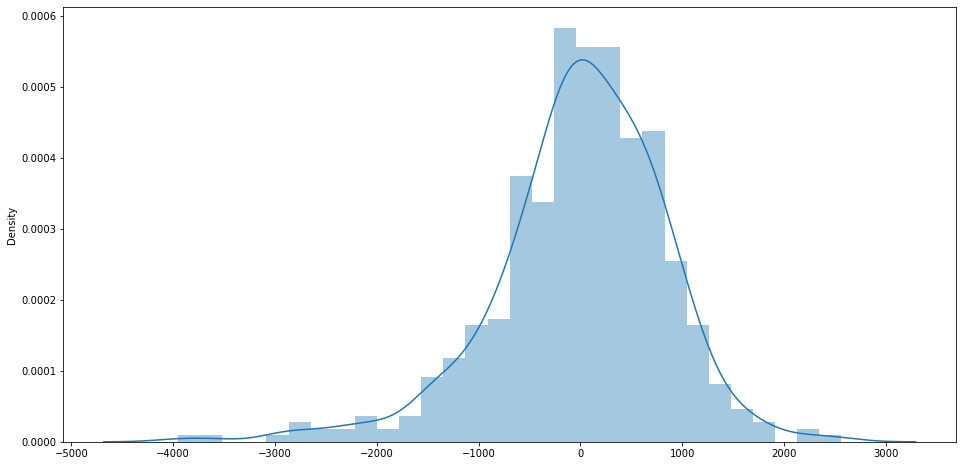

<AxesSubplot:xlabel='cnt'>

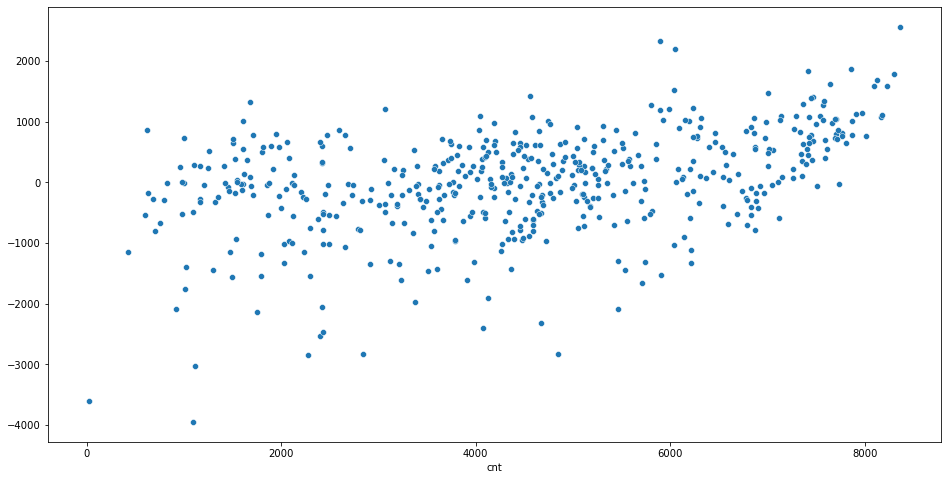

In [1125]:
#plotting the histogram for residual
plt.figure(figsize=(16,8))
sns.distplot(residuals,bins=30)
plt.show()
# plotting the scatter plot for residual
plt.figure(figsize=(16,8))
sns.scatterplot(y_train,residuals)

### Observation: Residual analysis of training data reveals

### 1. Residuals follow normal distribution with mean at 0

### 2. The variance of residual is more or less contant(slightly decreasing at the end)


# Making Predictions Using the Final Model

### Dividing test set into X_test and y_test

In [1126]:
#dividing the df test
y_test=df_test['cnt']
X_test=df_test.drop('cnt',axis=1)


In [1131]:
# remove the columns removed from the X train from X test
X_test_new=X_test[X_train_rfe.columns]

In [1132]:
# adding constant
X_test_new=sm.add_constant(X_test_new)

In [1133]:
# making predictions
y_test_predict=model.predict(X_test_new)

Text(0, 0.5, 'y_test_predict')

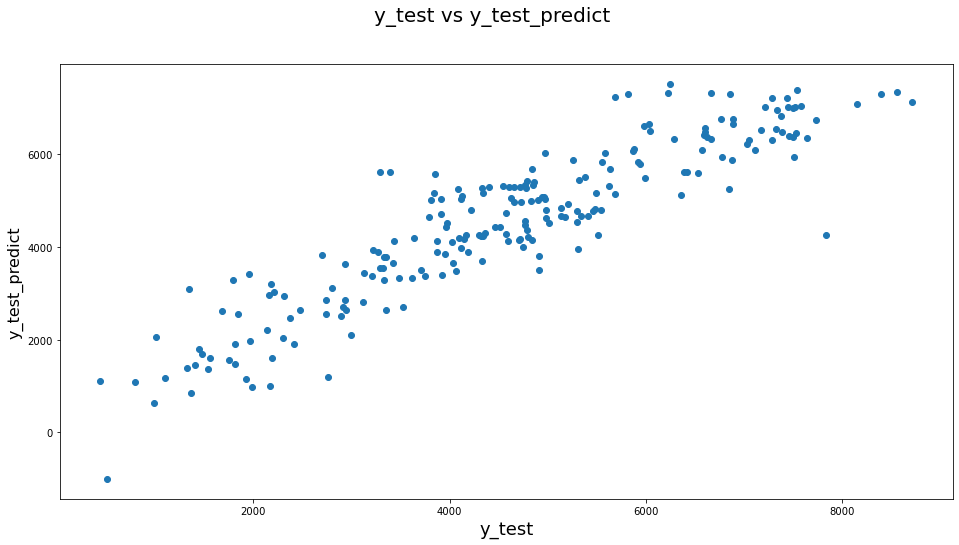

In [1134]:
fig = plt.figure(figsize=(16,8))
plt.scatter(y_test,y_test_predict)
fig.suptitle('y_test vs y_test_predict', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_predict', fontsize=16) 

### RMSE for TEST DATA

In [1135]:
np.sqrt(mean_squared_error(y_test, y_test_predict))

771.3505881041493

### r2 score for TEST DATA

In [1136]:
r2= r2_score(y_test, y_test_predict)
r2

0.8271275533686332

### Adjusted R2 for test data

In [1137]:
n=df_test.shape[0] # number of samples
p=len(X_test_new.columns)# number of variables
adj_r2=1-(1-r2)*(n-1)/(n-p-1)# adjusted R2 value
adj_r2

0.8178514708664623

In [1138]:
model.params

const                              2817.706656
yr                                 1992.717608
workingday                          507.179121
temp                                798.398680
season_spring                     -1150.008550
season_winter                       505.513309
weathersit_weather_clear            731.252841
weathersit_weather_light_precip   -1959.555566
weekday_Monday                      498.816801
mnth_Nov                           -474.184350
mnth_Sep                            579.287124
dtype: float64

### FINAL MODEL

### Train data -model

R-squared:	0.817

Adj. R-squared:	0.813

### Test data-model

R-squared:0.8271275533686333

Adj. R-squared: 0.8178514708664624

### We can see that the equation of our best fitted line is:

### count =	2817.706656 + (1992.717608 *yr) + (507.179121 * workingday )+ (798.398680 * temp) -(1150.008550 *season_spring) +( 505.513309 * season_winter) + (731.252841 * weathersit_weather_clear) - (1959.555566 *weathersit_weather_light_precip) - (498.816801 *  weekday_Monday) - (474.184350 * mnth_Nov) + (579.287124 *mnth_Sep) 

### TOP 3 PREDICTORS:


### From the equation above we can detrmine the top 3 predictors as 

### 1.  yr;   
###        A coefficient value of ’1992.717608' indicated that a unit increase in yr variable increases the bike hire    numbers by 1992.717608 units.-

### 2. Weather-,weather_light_precip:
###        A coefficient value of ’-' indicated that a unit increase in weather_light_precip variable decreases the bike hire numbers by  1959.555566units.

### 3. season_spring:
###        A coefficient value of ’ -' indicated that a unit increase in season_spring variable decreases the bike hire numbers by  1150.008550 units.
 
